In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [3]:
txt = os.getcwd() + '/Data/ex1data1.txt'
df = pd.read_csv(txt, names=["population","profit"], header=None)
print "Numer of training data: %i" %len(df)

Numer of training data: 97


In [4]:
df.head(6)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860


# 2.1 Plotting the data

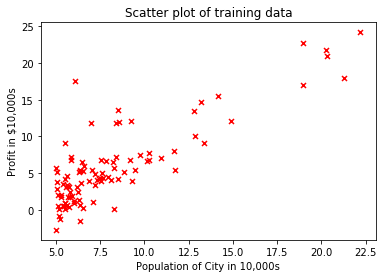

In [5]:
population = df[[0]]
profit = df[[1]]
plt.scatter(population, profit, marker='x',color='red',s = 25)
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

# 2.2 Gradient Descent

In [6]:
df.insert(0, 'Ones',1)
cols=df.shape[1]
X = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]
X =np.matrix(X.values)
y= np.matrix(y.values)
m = len(df)
alpha = 0.01
iterations = 1500
theta = np.matrix(np.array([0,0]))
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [7]:
def computeCost(X, y, theta):
    term = np.power(((X * theta.T)-y),2)
    return np.sum(term) / (2*m)
computeCost(X,y,theta)

32.072733877455676

In [8]:
def gradient(X, y, theta, alpha, iterations):
    theta_temp = np.matrix(np.zeros(theta.shape))
    theta_trail = np.zeros((1500, 2))
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        error = (X * theta.T) - y
        
        for j in range(theta.shape[1]):
            func = np.multiply(error, X[:,j])
            theta_temp[0,j] = theta[0,j] - ((alpha / m) * np.sum(func))
            
        theta_trail[i,:] = theta
        cost[i]=computeCost(X,y,theta)
        theta = theta_temp
    return theta, theta_trail, cost

theta, theta_trail, cost = gradient(X, y, theta, alpha, iterations)


In [9]:
cost[iterations-1]

4.4833882565877259

In [10]:
predict1 = [1, 3.5] * theta.T
predict2 = [1, 7] * theta.T
predict1, predict2

(matrix([[ 0.45197679]]), matrix([[ 4.53424501]]))

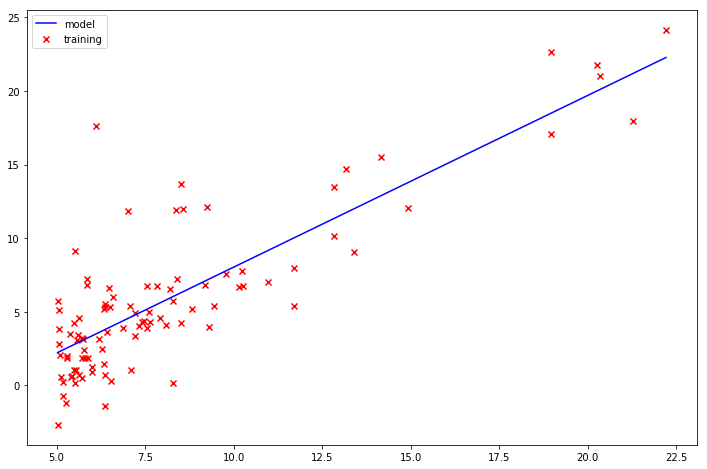

In [11]:
x = np.linspace(df.population.min(), df.population.max(),100)
f = theta[0,0] + (theta[0,1]*x)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(df.population, df.profit, marker='x', label="training", color='r')
ax.plot(x,f,'b', label= 'model')
ax.legend()

(4, 7)

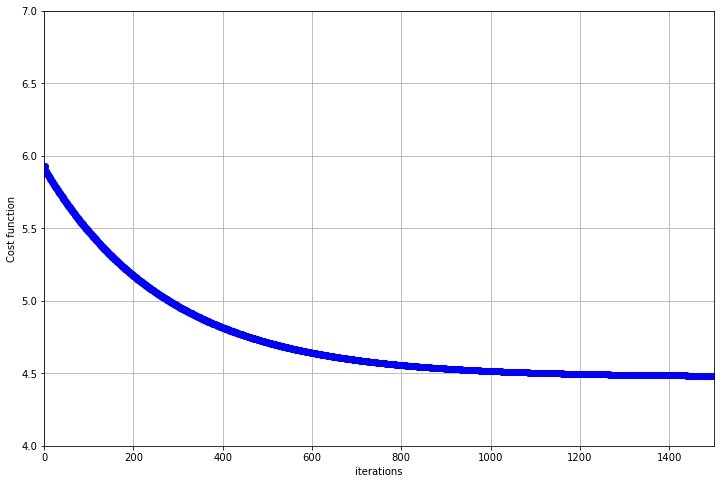

In [18]:
plt.figure(figsize=(12,8))
plt.plot(range(iterations),cost,'bo')
plt.xlabel('iterations')
plt.ylabel('Cost function')
plt.grid(True)
plt.xlim(0, 1500)
plt.ylim(4,7)

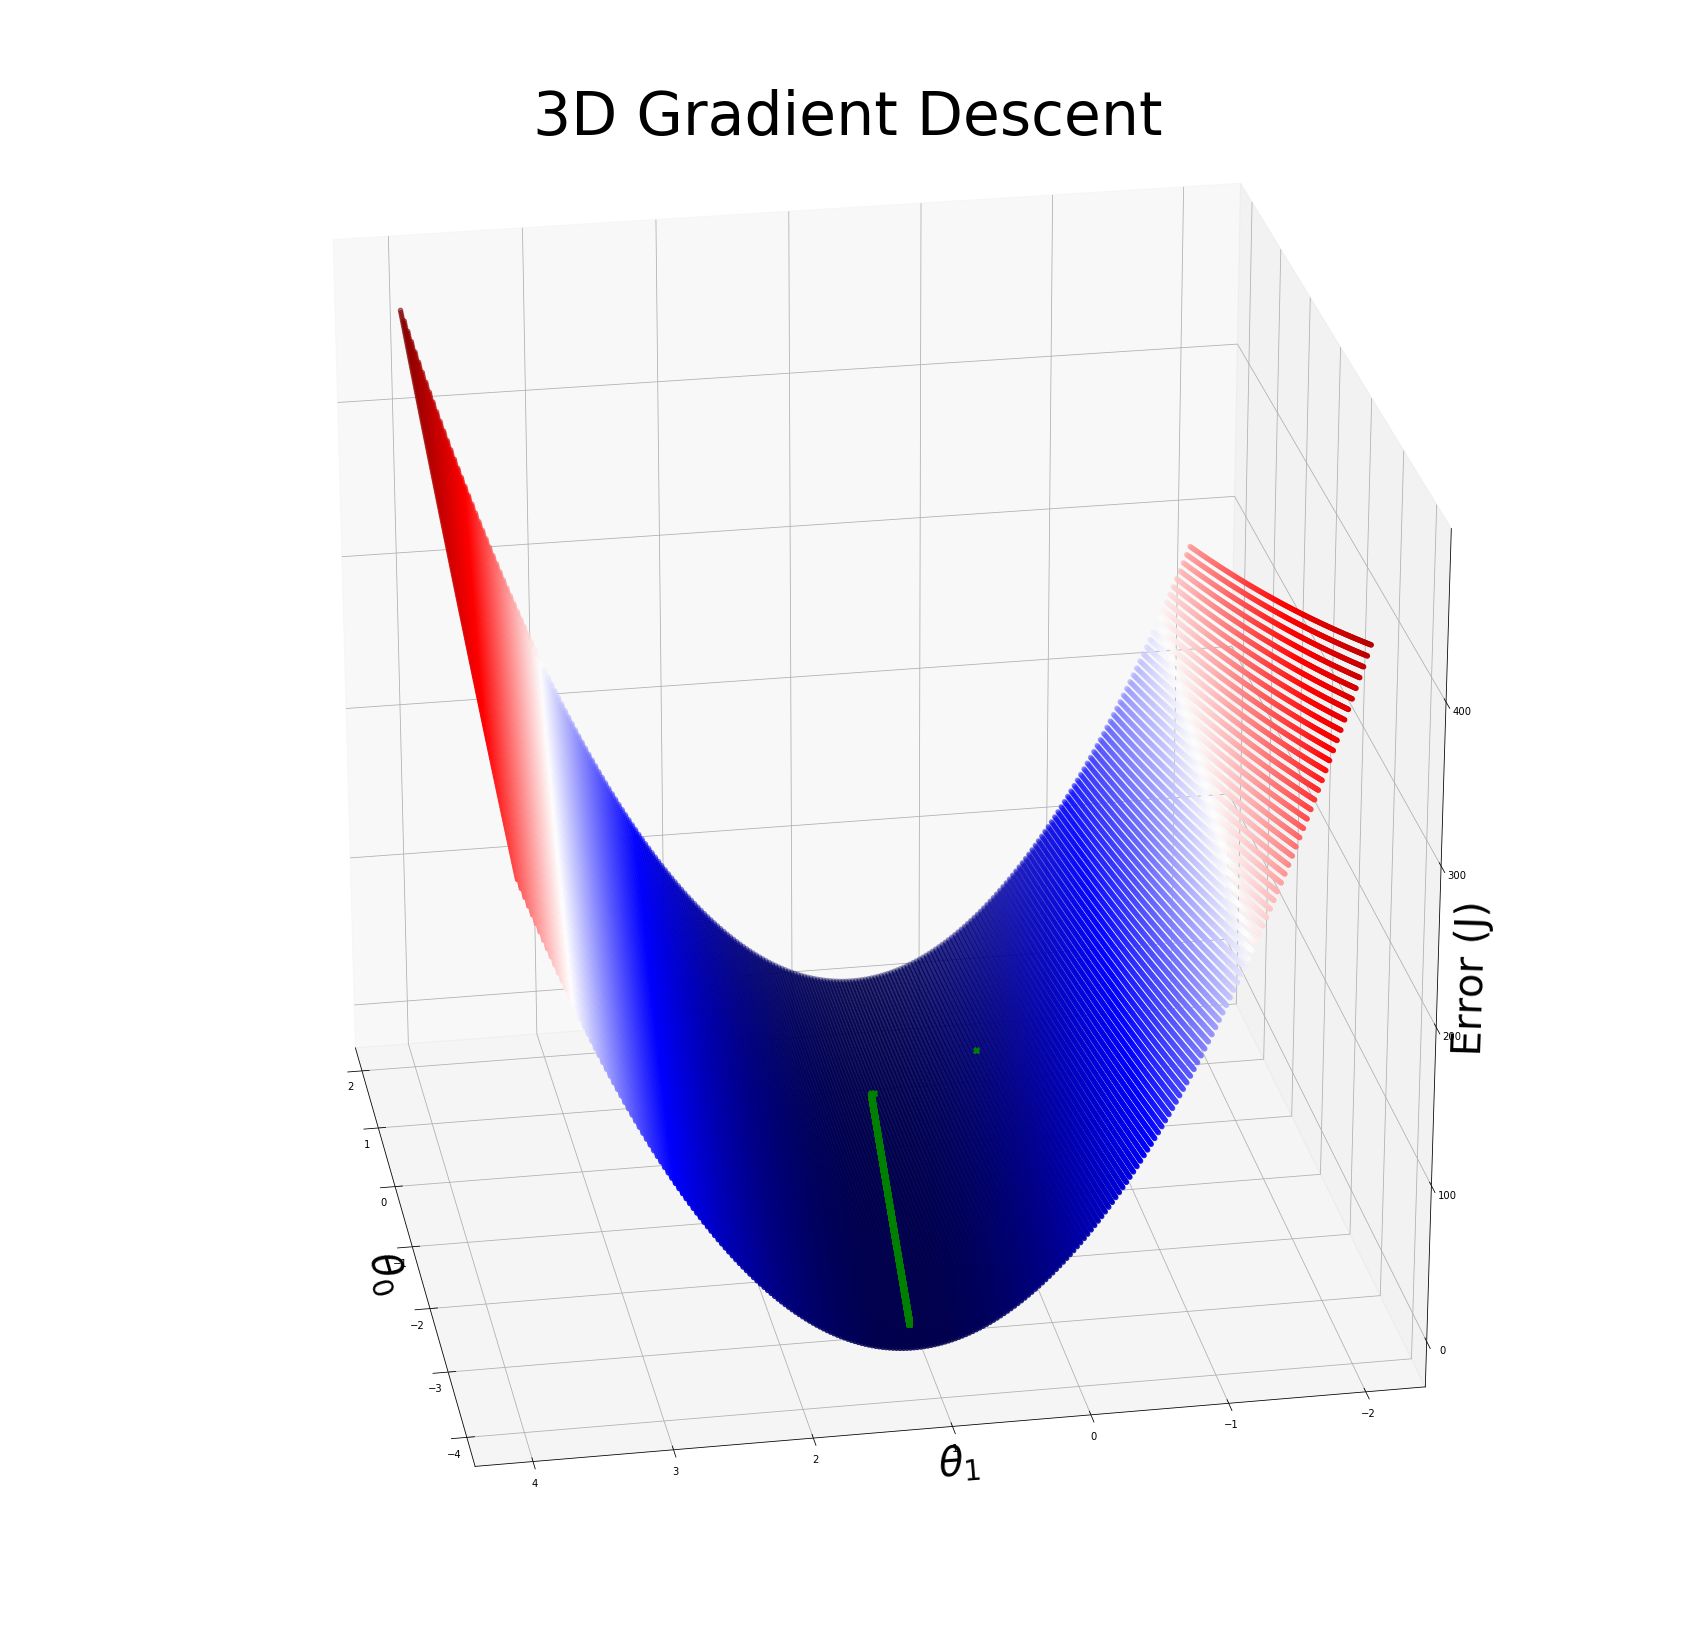

In [81]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (30,30))
ax = fig.gca(projection='3d')

xval = np.arange(-4,2,.025)
yval = np.arange(-2,4,.025)
xaxis, yaxis, zaxis = [], [], []
for i in xval:
    for j in yval:
        xaxis.append(i)
        yaxis.append(j)
        zaxis.append(computeCost(X,y,np.matrix(np.array([[i], [j]])).T))

ax.scatter(xaxis, yaxis, zaxis, c=np.abs(zaxis), cmap=plt.cm.seismic)
plt.plot([x[0] for x in theta_trail],[x[1] for x in theta_trail],cost, 'g^',marker='X')
ax.set_xlabel(r'$\theta_0$',fontsize=40)
ax.set_ylabel(r'$\theta_1$',fontsize=40)
ax.set_zlabel('Error (J)', fontsize=40)
ax.set_title('3D Gradient Descent', fontsize=60)
ax.view_init(elev=25., azim=170)

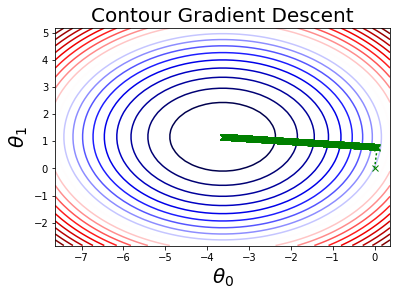

In [113]:
def f(x):
    return 0.5*x[0]**2 + 0.5*x[1]**2 

xmesh, ymesh = np.mgrid[-4:4:50j,-4:4:50j]
fmesh = f(np.array([xmesh, ymesh]))

plt.contour(xmesh+theta[0,0], ymesh+theta[0,1], fmesh,20, cmap=plt.cm.seismic)
plt.plot([x[0] for x in theta_trail],[x[1] for x in theta_trail],"g:", marker="x")
plt.xlabel(r'$\theta_0$',fontsize=20)
plt.ylabel(r'$\theta_1$',fontsize=20)
plt.title('Contour Gradient Descent', fontsize=20)